<a href="https://colab.research.google.com/github/simulate111/Production-Optimization/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Pyomo and the cbc solver
try:
  not_first_time == True
except:
  !pip install -q pyomo
  !apt-get install -y -qq coinor-cbc
  not_first_time = True
finally:
  print("Pyomo and solver installed")

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

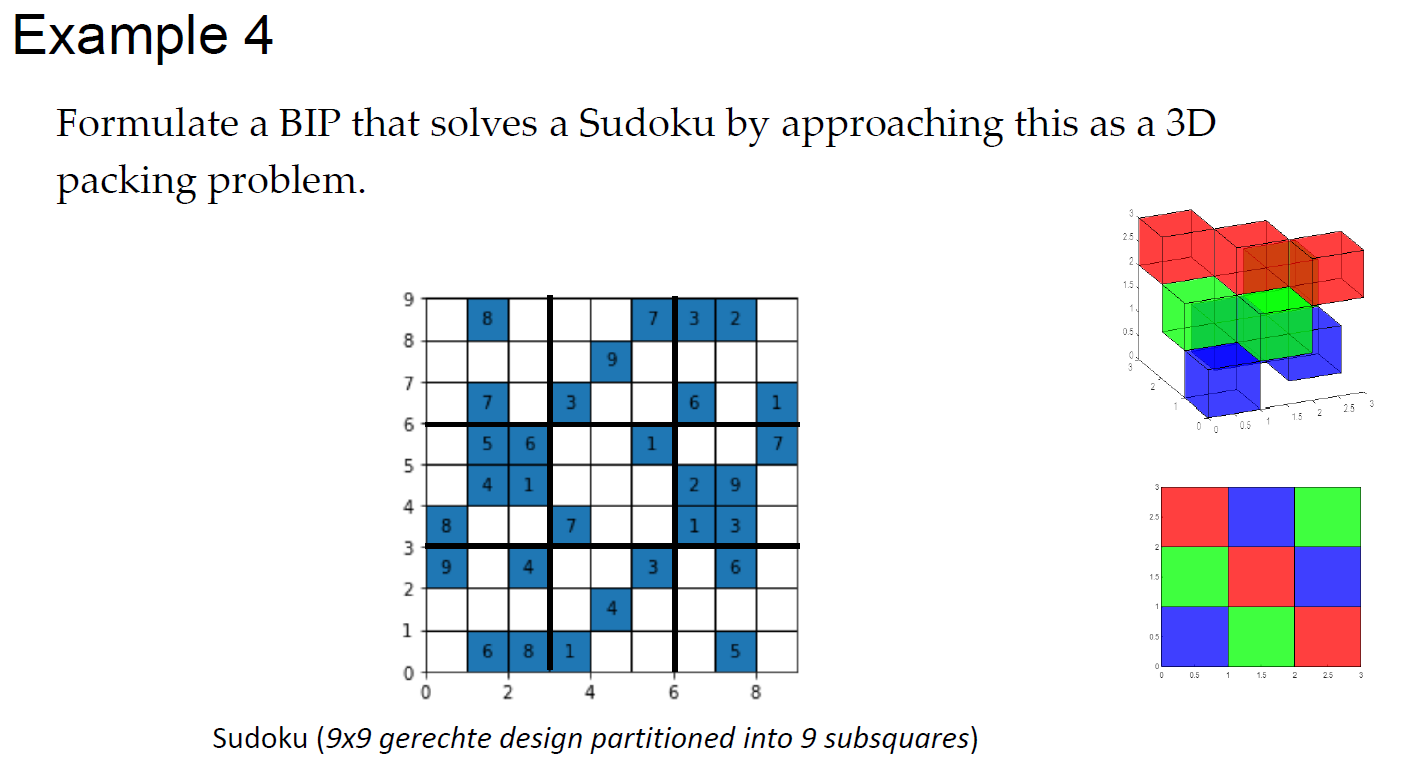

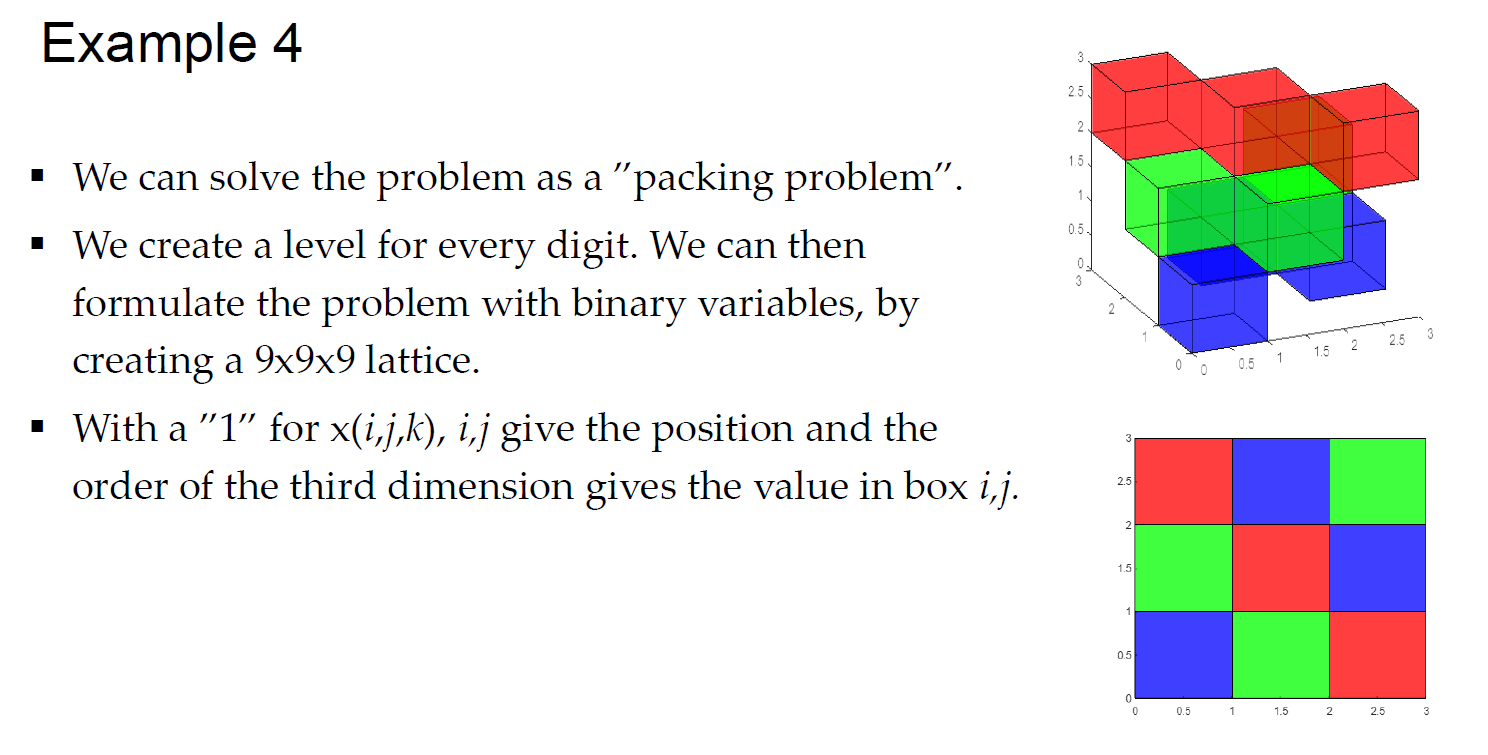

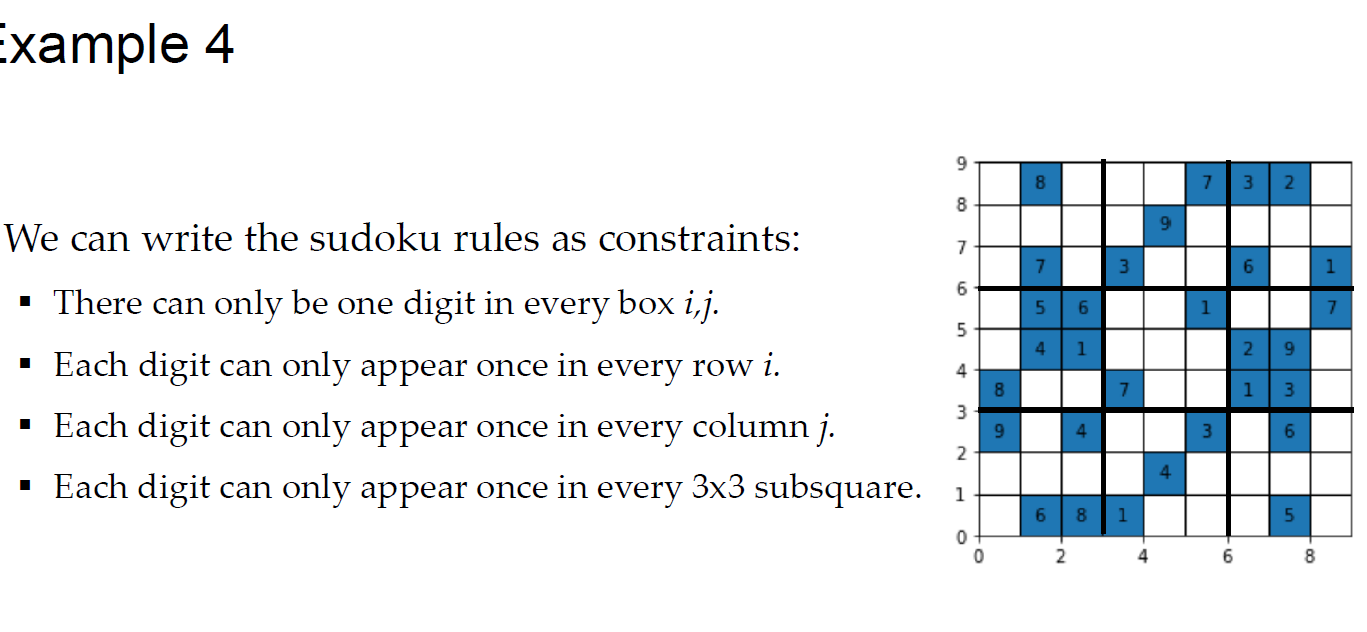

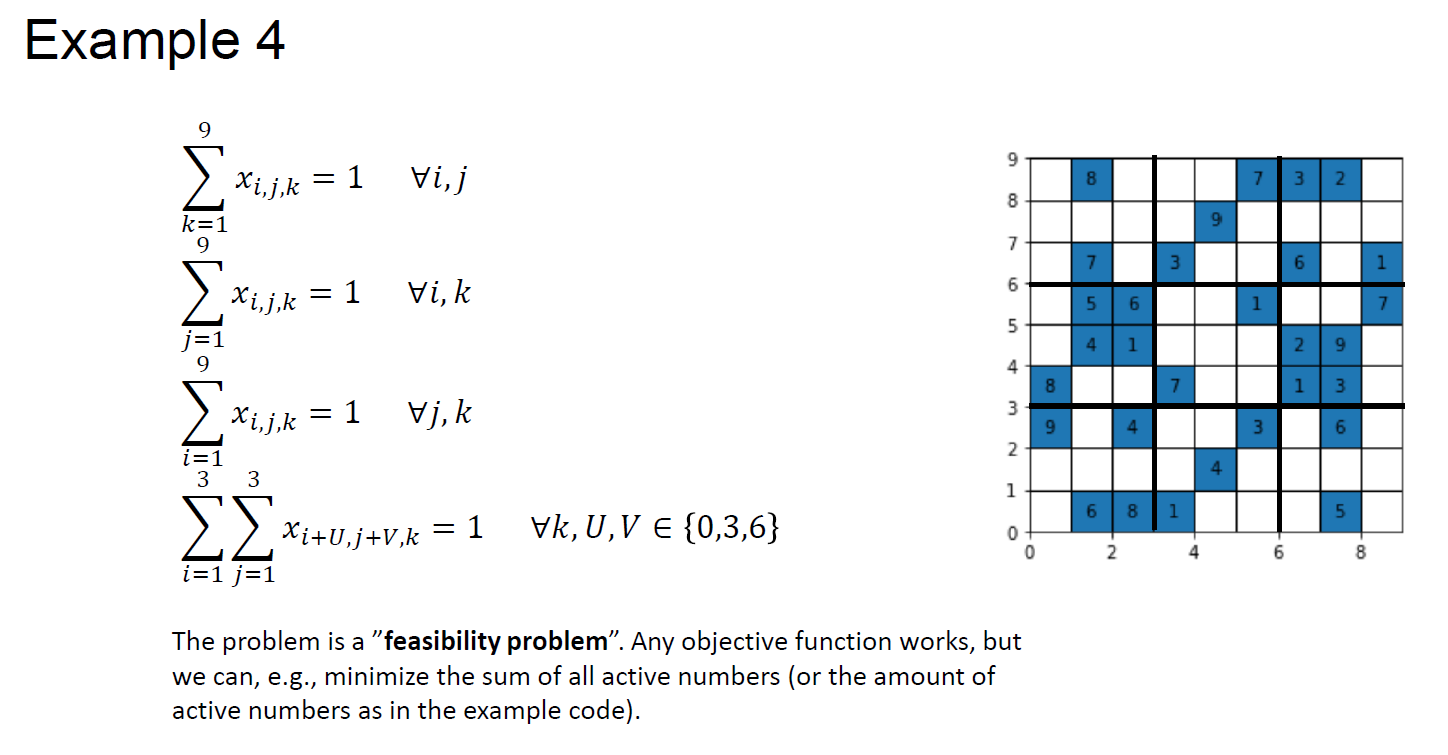

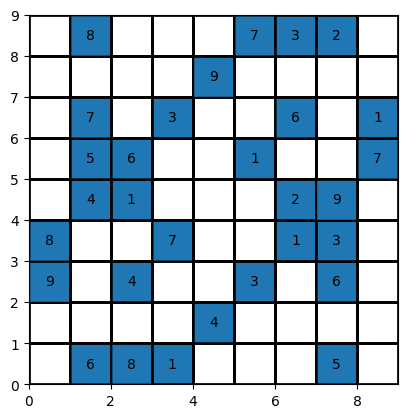

Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmp6amdrzsj.pyomo.lp -stat=1 -solve -solu /tmp/tmp6amdrzsj.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 0 (-324) rows, 0 (-700) columns and 0 (-2796) elements
Statistics for presolved model


Problem has 0 rows, 0 columns (0 with objective) and 0 elements
There are 21988 singletons with no objective 
Column breakdown:
0 of type 0.0->inf, 0 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 0 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of type G 1.0, 
0 of type G other, 0 of type L 0.0, 0 of type L 1.0, 
0 of type L other, 0 of type Range 0.0->1.0, 0 of type Range other, 
0 of type Free 
Presolve 0 (-324) rows, 0 (-700) columns and 0 (-2796) eleme

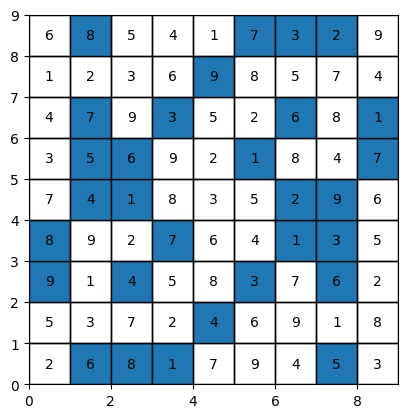

In [2]:
from pyomo.environ import *
import matplotlib.pyplot as plt

mod=ConcreteModel()


#rangeSet() is a set of ordered numbers in Pyomo. This makes it easy to manipulate.
mod.i=RangeSet(9)
mod.j=RangeSet(9)
mod.k=RangeSet(1,9)
mod.u=Set(initialize=[1,4,7])
mod.v=Set(initialize=[1,4,7])

#mod.x = Var(mod.i,mod.j,mod.k,within=Binary, initialize=0, doc="Is the position occupied?")

#Actually this will work! (since there are only zeros and ones in the problem)
mod.x = Var(mod.i,mod.j,mod.k,within=Reals, bounds=(0,1), initialize=0, doc="Is the position occupied?")

def Layer_rule(mod,i,j):
    return sum(mod.x[i,j,k] for k in mod.k) == 1

mod.layer = Constraint(mod.i, mod.j, rule=Layer_rule,doc='Only one of each number in each layer')

def Row_rule(mod,j,k):
    return sum(mod.x[i,j,k] for i in mod.i) == 1

mod.row = Constraint(mod.j, mod.k, rule=Row_rule,doc='Only one of each number in each row')

def Column_rule(mod,i,k):
    return sum(mod.x[i,j,k] for j in mod.j) == 1

mod.column = Constraint(mod.i, mod.k, rule=Column_rule,doc='Only one of each number in each column')

def Subsquare_rule(mod,u,v,k):
    return sum(mod.x[i+u,j+v,k] for i in range(3) for j in range(3)) == 1
mod.subsquare = Constraint(mod.u, mod.v,mod.k, rule=Subsquare_rule,doc='Only one of each number in each 3x3 sub-square')

#Fix given positions
mod.x[1,3,9].fix(1)
mod.x[1,4,8].fix(1)
mod.x[2,1,6].fix(1)
mod.x[2,5,4].fix(1)
mod.x[2,6,5].fix(1)
mod.x[2,7,7].fix(1)
mod.x[2,9,8].fix(1)
mod.x[3,1,8].fix(1)
mod.x[3,3,4].fix(1)
mod.x[3,5,1].fix(1)
mod.x[3,6,6].fix(1)
mod.x[4,1,1].fix(1)
mod.x[4,4,7].fix(1)
mod.x[4,7,3].fix(1)
mod.x[5,2,4].fix(1)
mod.x[5,8,9].fix(1)
mod.x[6,3,3].fix(1)
mod.x[6,6,1].fix(1)
mod.x[6,9,7].fix(1)
mod.x[7,4,1].fix(1)
mod.x[7,5,2].fix(1)
mod.x[7,7,6].fix(1)
mod.x[7,9,3].fix(1)
mod.x[8,1,5].fix(1)
mod.x[8,3,6].fix(1)
mod.x[8,4,3].fix(1)
mod.x[8,5,9].fix(1)
mod.x[8,9,2].fix(1)
mod.x[9,6,7].fix(1)
mod.x[9,7,1].fix(1)

#Plot the result (ony one "subplot" specified)
figure, axes = plt.subplots()

for i in mod.i:
    for j in mod.j:
        for k in mod.k:
            if mod.x[i,j,k].value==1:
                if mod.x[i,j,k].fixed == True:
                    p = plt.Rectangle((i-1,j-1), 1, 1, fill=True,edgecolor='black')
                    axes.add_artist(p)
                    axes.text(i-0.5, j-0.5, k, horizontalalignment='center',
                              verticalalignment='center')
            else:
                p = plt.Rectangle((i-1,j-1), 1, 1, fill=False,edgecolor='black')
                axes.add_artist(p)

axes.set_aspect(1)

plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

mod.obj = Objective(expr=summation(mod.x),sense=minimize)

#Specify solver
solver = SolverFactory('cbc', executable='/usr/bin/cbc')

#Verbous solving
results = solver.solve(mod,tee=True)

#plot the result (ony one "subplot" specified)
figure, axes = plt.subplots()

for i in mod.i:
    for j in mod.j:
        for k in mod.k:
            if mod.x[i,j,k].value==1:
                axes.text(i-0.5, j-0.5, k, horizontalalignment='center',
                          verticalalignment='center')
                if mod.x[i,j,k].fixed == True:
                    p = plt.Rectangle((i-1,j-1), 1, 1, fill=True,edgecolor='black')
                    axes.add_artist(p)
                else:
                    p = plt.Rectangle((i-1,j-1), 1, 1, fill=False,edgecolor='black')
                    axes.add_artist(p)

axes.set_aspect(1)

plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

#to see the equations
#mod.pprint()


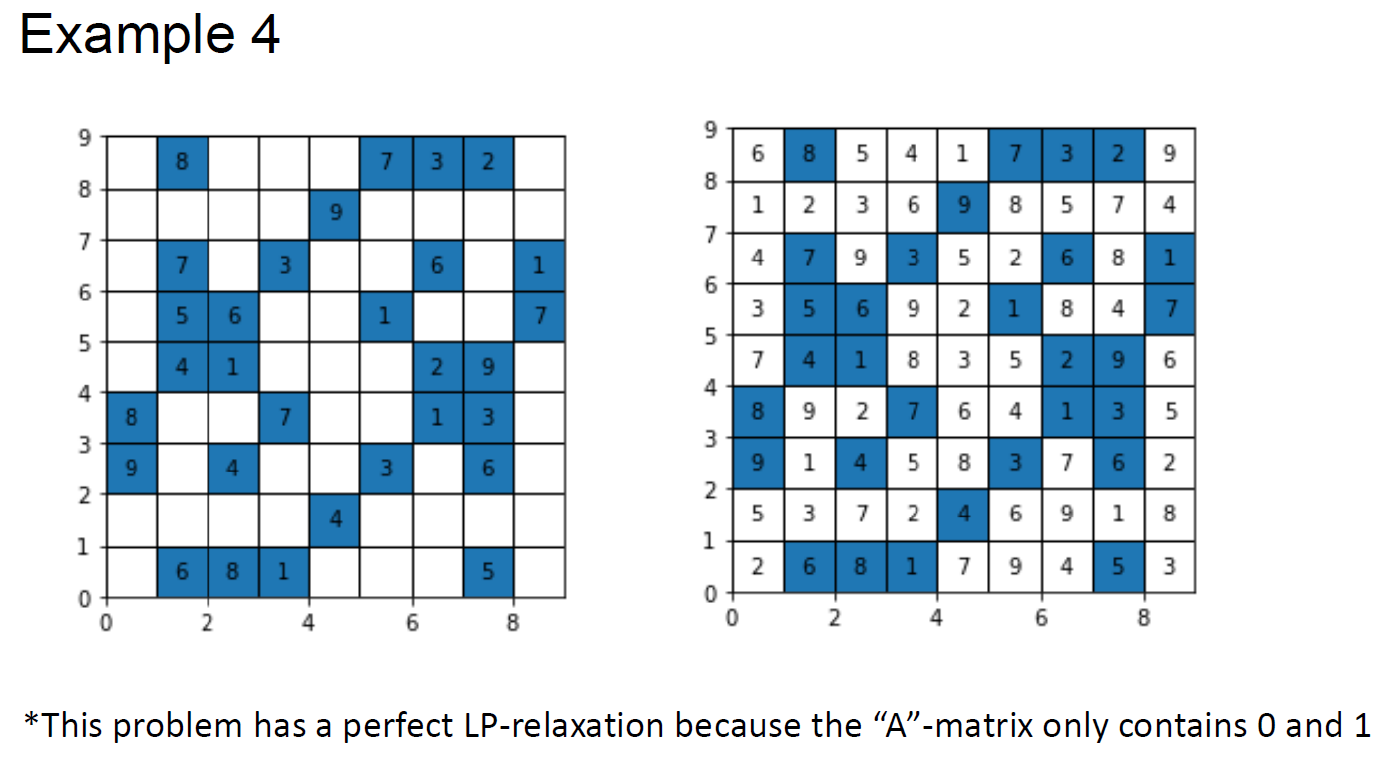